In [1]:
using Revise
using FUSE
using IMAS
using Plots;
FUSE.logging(Logging.Info; actors=Logging.Debug);

## H-mode profile

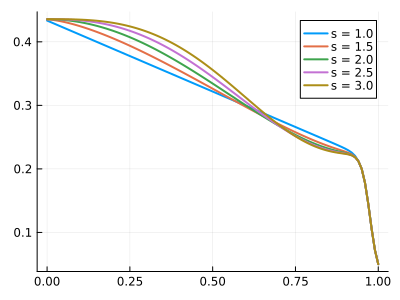

In [2]:
edge = 0.05
ped = 0.2
core = 1.0
ngrid = 101
shaping = [1.0, 1.5, 2.0, 2.5, 3.0]
ped_width = 0.05

xpsi = LinRange(0.0, 1.0, ngrid)

p = plot(size=(400,300))

for s in shaping

    #prof = IMAS.Hmode_profiles(edge,ped,core,ngrid,s,s,ped_width)
    prof = IMAS.Hmode_profiles(edge,ped,ngrid,s,s,ped_width)

    label = "s = "*string(s)
    plot!(p,xpsi,prof, lw=2, label=label)
end

display(p)

## ITB profile

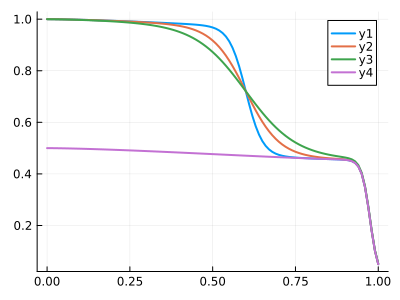

In [3]:
edge = 0.05
ped = 0.4
core = 1.0
ngrid = 101
shaping = 1.5 #[1.0, 1.5, 2.0, 2.5, 3.0]
ped_width = 0.05

xpsi = LinRange(0.0, 1.0, ngrid)

ITBr = 0.6
ITBw = 0.1
ITBh = 0.5

widths = [0.05, 0.1, 0.15]

p = plot(size=(400,300))

for w in widths

    val = @. 0.5 * ITBh * (1.0 - tanh((xpsi - ITBr) / w))

    prof = IMAS.Hmode_profiles(edge,ped,core-ITBh,ngrid,shaping,shaping,ped_width)
    #prof = IMAS.Hmode_profiles(edge,ped,ngrid,shaping,shaping,ped_width)

    plot!(p,xpsi,prof+val, lw=2,)
end

prof = IMAS.Hmode_profiles(edge,ped,core-ITBh,ngrid,shaping,shaping,ped_width)
#prof = IMAS.Hmode_profiles(edge,ped,ngrid,shaping,shaping,ped_width)

plot!(p,xpsi,prof, lw=2)

display(p)

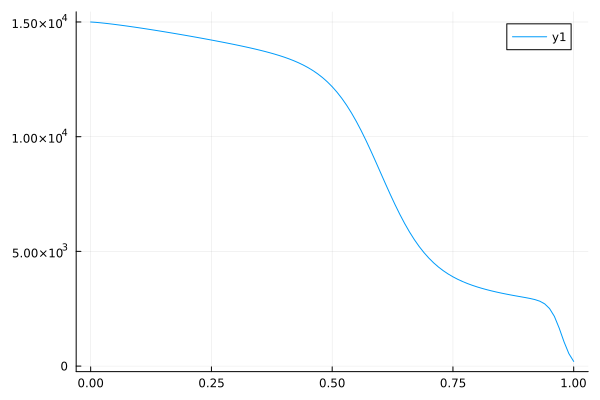

In [21]:
edge = 200
ped = 2500
core = 15000
ngrid = 101
shaping = 1.25
ped_width = 0.05

xpsi = LinRange(0.0, 1.0, ngrid)

ITBr = 0.6
ITBw = 0.1
ITBh = 0.7


val = IMAS.ITB_profiles(edge,ped,core,ngrid,shaping,shaping,ped_width,ITBr,ITBw,(core-ped)*ITBh)

plot(xpsi, val)